# Weather Forecast Using Regression Analysis

## Importing all essential packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression

## Reading the dataset

In [2]:
df = pd.read_csv('Kerala weather 2020-22.csv', index_col='datetime')
df.head()

,name,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,windspeed,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,moonphase,description
datetime,,,,,,,,,,,,,,,,,,,
01-01-2020,Kerala,31.8,24.6,28.2,38.4,24.6,32.0,24.8,82.6,0.00,14.8,1012.2,32.3,4.3,254.9,22.1,9,0.17,Partly cloudy throughout the day.
02-01-2020,Kerala,31.8,24.6,28.4,37.9,24.6,32.0,24.5,80.6,0.00,13.0,1013.2,28.7,4.5,251.9,21.9,9,0.22,Partly cloudy throughout the day.
03-01-2020,Kerala,32.1,25.0,28.7,39.1,25.0,33.2,24.8,79.9,0.00,18.4,1012.3,33.6,5.1,251.4,21.8,9,0.26,Partly cloudy throughout the day.
04-01-2020,Kerala,32.1,25.5,28.3,39.2,25.5,32.4,25.0,83.3,78.93,11.2,1010.9,47.9,4.4,251.3,21.9,9,0.31,Partly cloudy throughout the day with rain.
05-01-2020,Kerala,31.2,25.4,28.5,37.7,25.4,32.7,24.9,81.3,10.60,13.0,1010.7,57.0,4.9,216.5,18.7,8,0.36,Partly cloudy throughout the day with rain cle...


## Going through the columns

In [3]:
df.columns

Index(['name', 'tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin',
       'feelslike', 'dew', 'humidity', 'precip', 'windspeed',
       'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation',
       'solarenergy', 'uvindex', 'moonphase', 'description'],
      dtype='object')

## Dimension of the dataset 

In [4]:
df.shape

(882, 19)

## Checking null values

In [5]:
df.isnull().any()

name                False
tempmax             False
tempmin             False
temp                False
feelslikemax        False
feelslikemin        False
feelslike           False
dew                 False
humidity            False
precip              False
windspeed           False
sealevelpressure     True
cloudcover          False
visibility          False
solarradiation      False
solarenergy         False
uvindex             False
moonphase           False
description         False
dtype: bool

## Removing null values and description of the dataset

In [6]:
df=df.dropna()
df.describe()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,windspeed,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,moonphase
count,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000
mean,31.573893,25.216232,28.378547,38.249149,25.490125,32.188536,24.288990,79.462316,10.344120,15.127923,1009.301703,51.690806,4.459024,214.237571,18.493417,7.524404,0.502270
std,1.363776,1.035713,1.061241,2.384539,1.751715,2.262896,1.148637,7.030777,21.284316,4.948709,1.583490,17.695815,0.464160,60.783062,5.247710,2.059823,0.307469
min,26.000000,21.100000,24.700000,26.000000,21.100000,24.700000,18.000000,54.200000,0.000000,3.600000,1003.400000,23.700000,2.500000,65.500000,5.700000,2.000000,0.000000
25%,31.000000,24.600000,27.700000,36.800000,24.600000,30.800000,23.700000,74.200000,0.000000,11.200000,1008.200000,37.600000,4.200000,167.500000,14.400000,6.000000,0.250000
50%,32.000000,25.200000,28.400000,38.000000,25.200000,32.200000,24.400000,79.500000,1.700000,14.800000,1009.200000,49.300000,4.500000,223.900000,19.300000,8.000000,0.500000
75%,32.500000,25.900000,29.100000,39.600000,25.900000,33.800000,25.000000,84.900000,9.400000,18.400000,1010.500000,63.500000,4.700000,264.700000,22.800000,9.000000,0.750000
max,35.600000,28.000000,31.000000,45.700000,33.400000,37.900000,26.800000,96.200000,167.250000,37.100000,1013.200000,96.500000,6.200000,321.800000,27.700000,10.000000,1.000000


## Datatypes of columns

In [7]:
df.dtypes

name                 object
tempmax             float64
tempmin             float64
temp                float64
feelslikemax        float64
feelslikemin        float64
feelslike           float64
dew                 float64
humidity            float64
precip              float64
windspeed           float64
sealevelpressure    float64
cloudcover          float64
visibility          float64
solarradiation      float64
solarenergy         float64
uvindex               int64
moonphase           float64
description          object
dtype: object

## Seperating the factors that influence temperature( i.e. to be predicted)

In [8]:
df_new=df.loc[:,['tempmax','tempmin','temp','dew','humidity', 'precip','windspeed', 'sealevelpressure','cloudcover','uvindex']]
df_new.head()

,tempmax,tempmin,temp,dew,humidity,precip,windspeed,sealevelpressure,cloudcover,uvindex
datetime,,,,,,,,,,
01-01-2020,31.8,24.6,28.2,24.8,82.6,0.00,14.8,1012.2,32.3,9
02-01-2020,31.8,24.6,28.4,24.5,80.6,0.00,13.0,1013.2,28.7,9
03-01-2020,32.1,25.0,28.7,24.8,79.9,0.00,18.4,1012.3,33.6,9
04-01-2020,32.1,25.5,28.3,25.0,83.3,78.93,11.2,1010.9,47.9,9
05-01-2020,31.2,25.4,28.5,24.9,81.3,10.60,13.0,1010.7,57.0,8


In [9]:
#dimension of new dataset
df_new.shape

(881, 10)

In [10]:
#columns of new dataset
df_new.columns

Index(['tempmax', 'tempmin', 'temp', 'dew', 'humidity', 'precip', 'windspeed',
       'sealevelpressure', 'cloudcover', 'uvindex'],
      dtype='object')

## Plotting all columns

array([<AxesSubplot:xlabel='datetime'>, <AxesSubplot:xlabel='datetime'>,
       <AxesSubplot:xlabel='datetime'>, <AxesSubplot:xlabel='datetime'>,
       <AxesSubplot:xlabel='datetime'>, <AxesSubplot:xlabel='datetime'>,
       <AxesSubplot:xlabel='datetime'>, <AxesSubplot:xlabel='datetime'>,
       <AxesSubplot:xlabel='datetime'>, <AxesSubplot:xlabel='datetime'>],
      dtype=object)

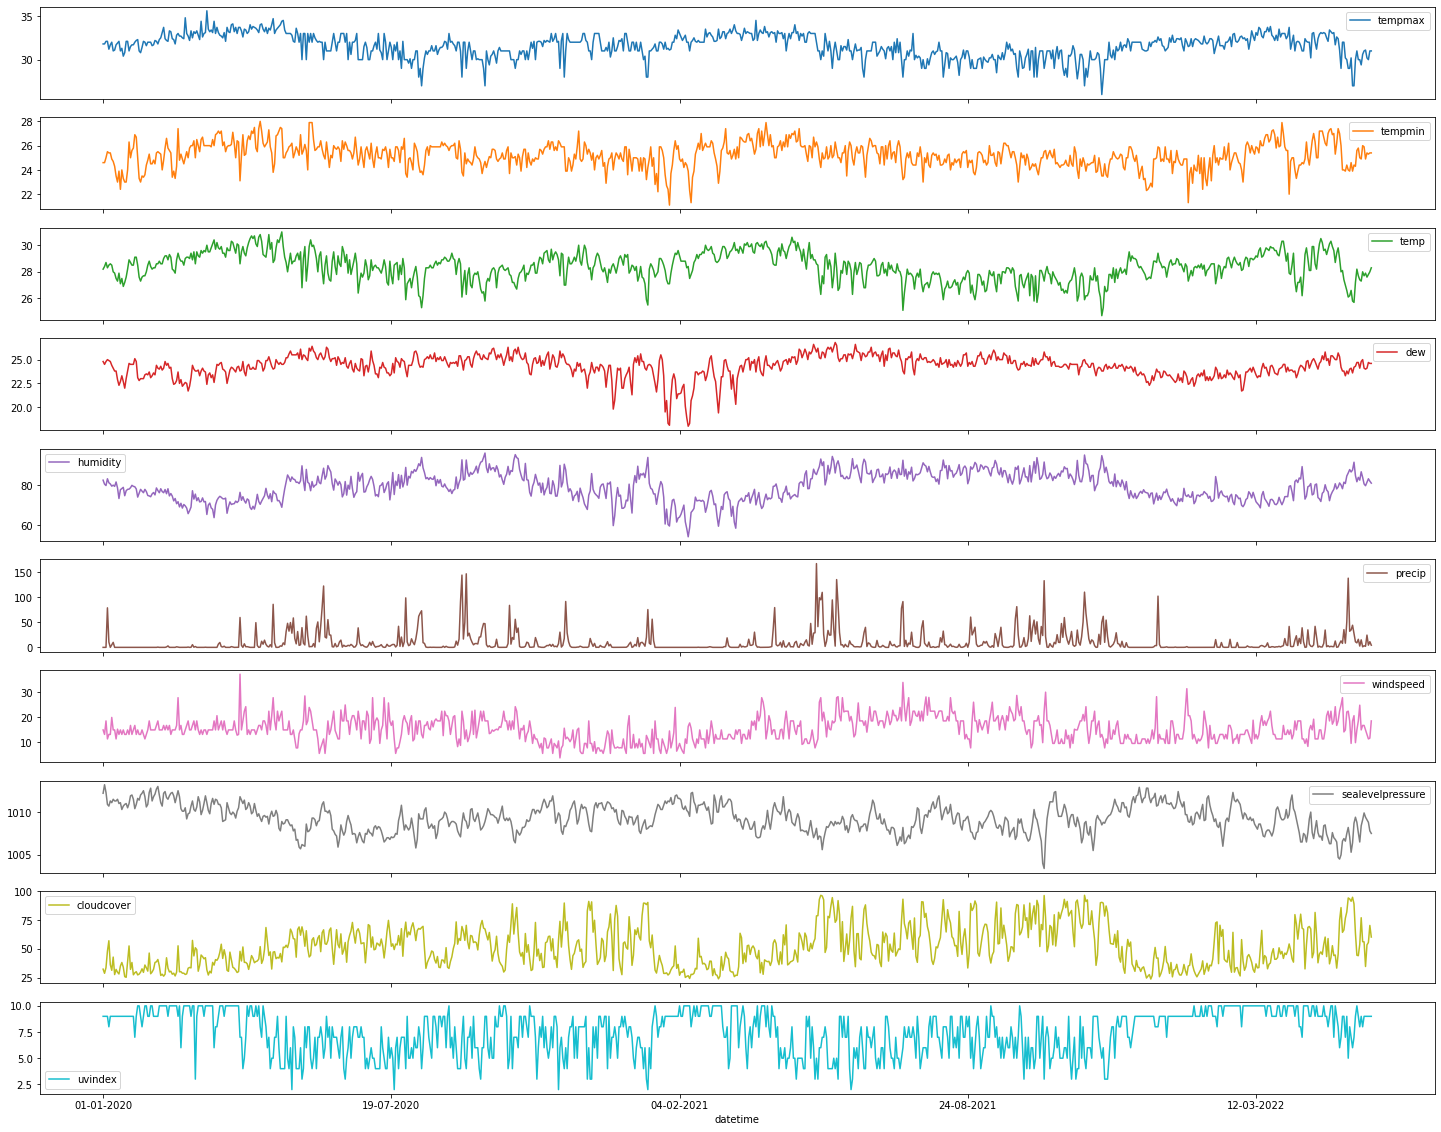

In [11]:
df_new.plot(subplots=True, figsize=(25,20))

array([[<AxesSubplot:title={'center':'tempmax'}>,
        <AxesSubplot:title={'center':'tempmin'}>,
        <AxesSubplot:title={'center':'temp'}>],
       [<AxesSubplot:title={'center':'dew'}>,
        <AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'precip'}>],
       [<AxesSubplot:title={'center':'windspeed'}>,
        <AxesSubplot:title={'center':'sealevelpressure'}>,
        <AxesSubplot:title={'center':'cloudcover'}>],
       [<AxesSubplot:title={'center':'uvindex'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

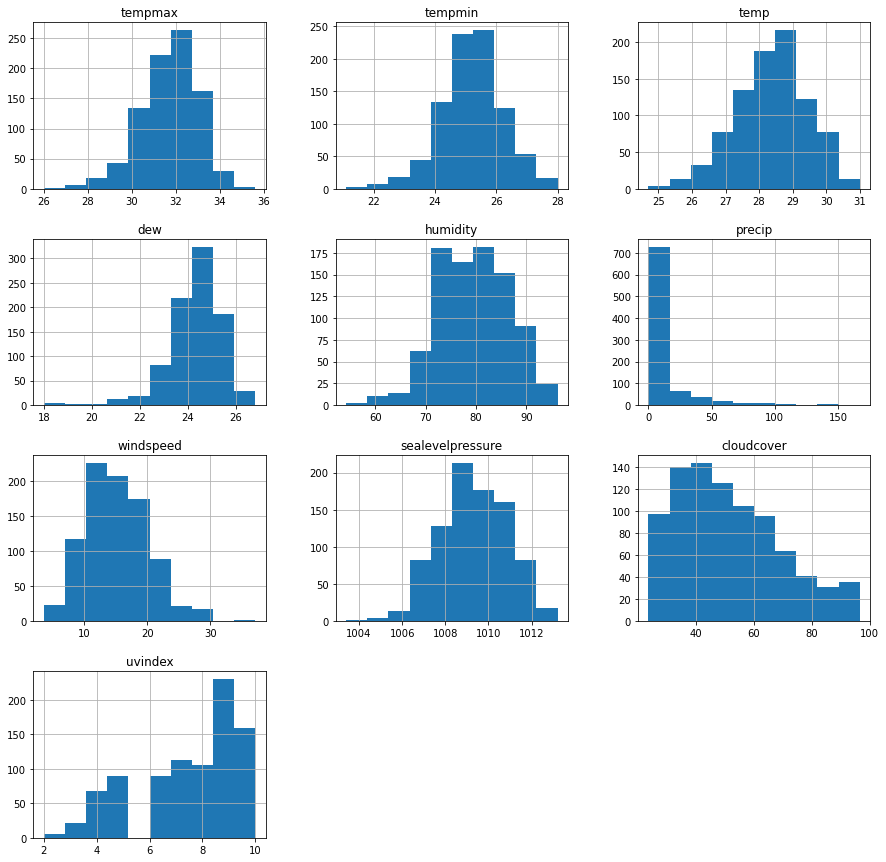

In [12]:
df_new.hist(bins=10,figsize=(15,15))

In [13]:
df_new.corr()

,tempmax,tempmin,temp,dew,humidity,precip,windspeed,sealevelpressure,cloudcover,uvindex
tempmax,1.000000,0.403041,0.867815,-0.209896,-0.744527,-0.370365,-0.156509,0.210999,-0.632180,0.341564
tempmin,0.403041,1.000000,0.678977,0.433057,-0.158568,-0.162180,0.067234,-0.176315,-0.092869,-0.028390
temp,0.867815,0.678977,1.000000,-0.014821,-0.697490,-0.415464,-0.141557,0.127374,-0.591599,0.286492
dew,-0.209896,0.433057,-0.014821,1.000000,0.723587,0.233015,0.236118,-0.396961,0.404461,-0.422615
humidity,-0.744527,-0.158568,-0.697490,0.723587,1.000000,0.467413,0.267842,-0.373791,0.698410,-0.505143
precip,-0.370365,-0.162180,-0.415464,0.233015,0.467413,1.000000,0.133963,-0.237782,0.525824,-0.333512
windspeed,-0.156509,0.067234,-0.141557,0.236118,0.267842,0.133963,1.000000,-0.281723,0.177485,-0.090455
sealevelpressure,0.210999,-0.176315,0.127374,-0.396961,-0.373791,-0.237782,-0.281723,1.000000,-0.460841,0.333976
cloudcover,-0.632180,-0.092869,-0.591599,0.404461,0.698410,0.525824,0.177485,-0.460841,1.000000,-0.559045
uvindex,0.341564,-0.028390,0.286492,-0.422615,-0.505143,-0.333512,-0.090455,0.333976,-0.559045,1.000000


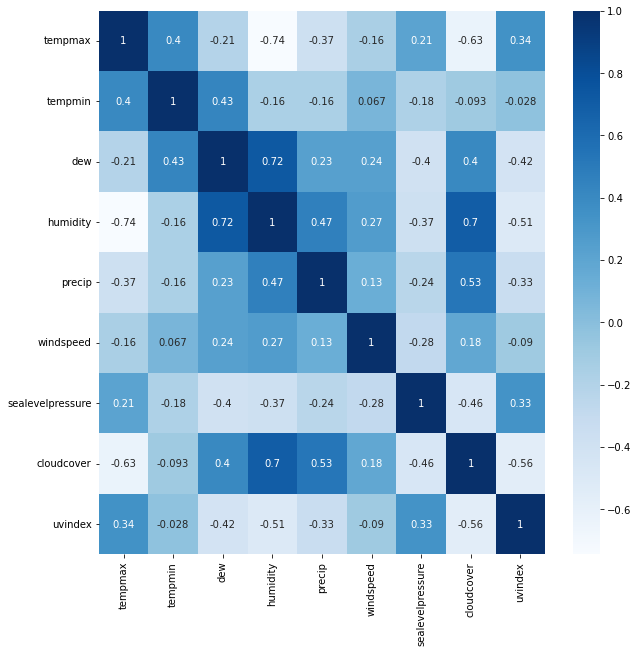

In [39]:
import seaborn as sns
plt.figure(figsize  =(10,10))
sns.heatmap(df_new.corr(),annot=True, cmap= 'Blues')
plt.show()

In [15]:
weather=df_new[-250:]
weather.head()

,tempmax,tempmin,temp,dew,humidity,precip,windspeed,sealevelpressure,cloudcover,uvindex
datetime,,,,,,,,,,
24-09-2021,31.2,25.5,28.3,24.6,80.6,0.60,21.2,1007.9,51.4,7
25-09-2021,30.6,25.5,28.1,24.9,83.1,4.40,18.4,1008.2,47.4,5
26-09-2021,30.7,25.0,26.9,24.9,89.0,56.65,19.1,1006.8,80.7,7
27-09-2021,29.0,24.4,26.4,24.2,88.0,81.28,28.6,1007.2,88.5,5
28-09-2021,28.0,23.0,25.8,23.9,89.7,24.98,23.0,1009.2,87.8,7


In [16]:
y=df_new.pop("temp")
X=df_new

## Split the data into training and test sets importing

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)

In [18]:
X_train.shape

(704, 9)

In [19]:
y_train.shape

(704,)

In [20]:
y_train.head()

datetime
07-04-2022    29.4
21-09-2021    28.3
18-03-2021    29.4
25-01-2021    28.1
08-06-2021    27.8
Name: temp, dtype: float64

# Linear Regression

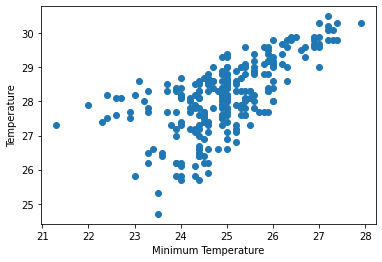

In [21]:
plt.scatter(weather.tempmin, weather.temp)
plt.xlabel("Minimum Temperature")
plt.ylabel("Temperature")
plt.show()

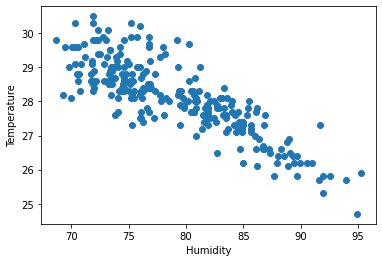

In [22]:
plt.scatter(weather.humidity, weather.temp)
plt.xlabel("Humidity")
plt.ylabel("Temperature")
plt.show()

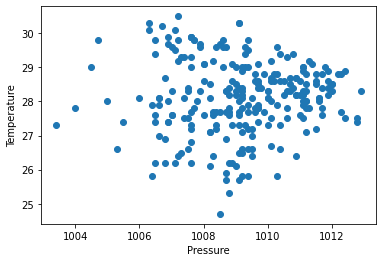

In [23]:
plt.scatter(weather.sealevelpressure, weather.temp)
plt.xlabel("Pressure")
plt.ylabel("Temperature")
plt.show()

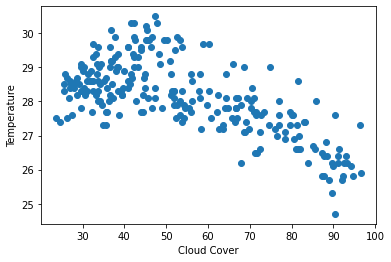

In [24]:
plt.scatter(weather.cloudcover, weather.temp)
plt.xlabel("Cloud Cover")
plt.ylabel("Temperature")
plt.show()

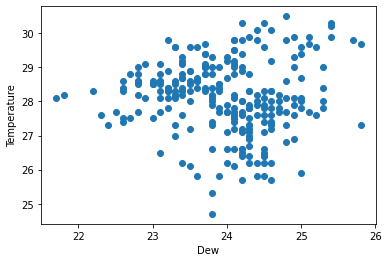

In [25]:
plt.scatter(weather.dew, weather.temp)
plt.xlabel("Dew")
plt.ylabel("Temperature")
plt.show()

In [26]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [27]:
pred = model.predict(X_test)

In [28]:
#Calculating error
np.mean(np.absolute(pred-y_test))

0.0778125539048865

### Variance score

In [29]:
print('Variance score: %.2f' % model.score(X_test,y_test))

Variance score: 0.99


### Predicted Table using Linear Regression

In [30]:
for i in range(len(pred)):
  pred[i]=round(pred[i],2)
pd.DataFrame({'Actual':y_test,'Prediction':pred,'diff':(y_test-pred)})

,Actual,Prediction,diff
datetime,,,
07-05-2020,28.7,28.81,-0.11
06-06-2020,27.4,27.35,0.05
31-10-2021,26.6,26.64,-0.04
13-10-2020,26.9,26.65,0.25
08-08-2020,26.1,26.09,0.01
...,...,...,...
27-09-2020,28.2,28.09,0.11
11-06-2021,28.6,28.56,0.04
21-11-2020,28.6,28.53,0.07


### Accuracy Score

In [31]:
model.score(X_test,y_test)

0.9906956085891303

### Calculating Error

In [32]:
from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, pred)))

Mean Absolute Error:  0.07813559322033901
Mean Squared Error:  0.012148587570621485
Root Mean Squared Error:  0.11022063132926378


# Decision Tree Regression

In [33]:
from sklearn.tree import DecisionTreeRegressor
model2=DecisionTreeRegressor(random_state=0)
model2.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [34]:
pred2=model2.predict(X_test)
np.mean(np.absolute(pred2-y_test))

0.33841807909604504

### Variance score

In [35]:
print('Variance score: %.2f' % model2.score(X_test, y_test))

Variance score: 0.87


### Predicted Table using Decision Tree Regression

In [36]:
for i in range(len(pred2)):
  pred2[i]=round(pred2[i],2)
pd.DataFrame({'Actual':y_test,'Prediction':pred2,'diff':(y_test-pred2)})

,Actual,Prediction,diff
datetime,,,
07-05-2020,28.7,28.5,0.2
06-06-2020,27.4,27.9,-0.5
31-10-2021,26.6,26.7,-0.1
13-10-2020,26.9,27.8,-0.9
08-08-2020,26.1,26.2,-0.1
...,...,...,...
27-09-2020,28.2,28.3,-0.1
11-06-2021,28.6,28.5,0.1
21-11-2020,28.6,28.5,0.1


### Accuracy Score

In [37]:
model2.score(X_test,y_test)

0.8672384272478207

### Calculating Error

In [38]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, pred2))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, pred2))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, pred2)))

Mean Absolute Error:  0.3384180790960453
Mean Squared Error:  0.17305084745762722
Root Mean Squared Error:  0.4159938069943196
